In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


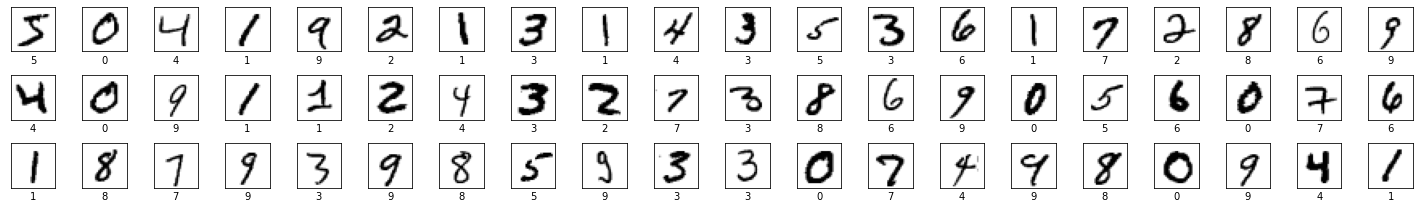

In [3]:
i = 0
plt.figure(figsize=(20,3))
for i in range(60):
    plt.subplot(3, 20, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

In [4]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

In [5]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    layers.Conv1D(filters=32, kernel_size=(5), activation='relu'),
    layers.MaxPool1D(pool_size=(2)),
    layers.Conv1D(filters=64, kernel_size=(3), activation='relu'),
    layers.MaxPool1D(pool_size=(2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 32)            4512      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               41088     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 7s 9ms/step - loss: 0.2831 - accuracy: 0.9163 - val_loss: 0.1222 - val_accuracy: 0.9623
Epoch 2/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0888 - accuracy: 0.9729 - val_loss: 0.1296 - val_accuracy: 0.9575
Epoch 3/10
657/657 [==============================] - 6s 10ms/step - loss: 0.0618 - accuracy: 0.9807 - val_loss: 0.0752 - val_accuracy: 0.9783
Epoch 4/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0622 - val_accuracy: 0.9812
Epoch 5/10
657/657 [==============================] - 6s 10ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0701 - val_accuracy: 0.9814
Epoch 6/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0696 - val_accuracy: 0.9822
Epoch 7/10
657/657 [==============================] - 6s 8ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0754 - val_accuracy: 0.9797
Epoc

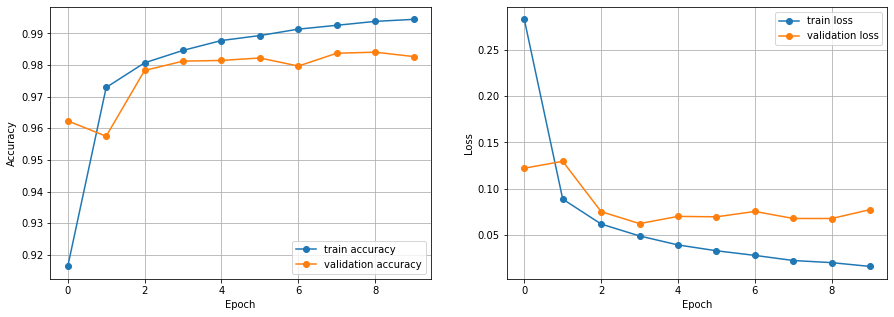

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9824

Test accuracy: 0.9824000000953674


In [10]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0653 - val_accuracy: 0.9858
Epoch 2/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0658 - val_accuracy: 0.9857
Epoch 3/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0651 - val_accuracy: 0.9857
Epoch 4/10
657/657 [==============================] - 5s 7ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0649 - val_accuracy: 0.9862
Epoch 5/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0652 - val_accuracy: 0.9864
Epoch 6/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0653 - val_accuracy: 0.9863
Epoch 7/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0656 - val_accuracy: 0.9866
Epoch 

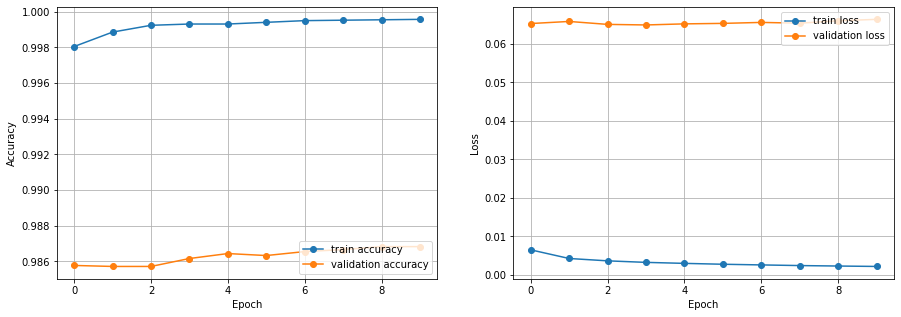

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9889

Test accuracy: 0.9889000058174133


In [14]:
model.compile(
    optimizer='Adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [15]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 7s 9ms/step - loss: 0.0177 - accuracy: 0.9939 - val_loss: 0.0825 - val_accuracy: 0.9819
Epoch 2/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0783 - val_accuracy: 0.9836
Epoch 3/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0718 - val_accuracy: 0.9848
Epoch 4/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0807 - val_accuracy: 0.9832
Epoch 5/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0841 - val_accuracy: 0.9827
Epoch 6/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0740 - val_accuracy: 0.9841
Epoch 7/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.0798 - val_accuracy: 0.9842
Epoch 

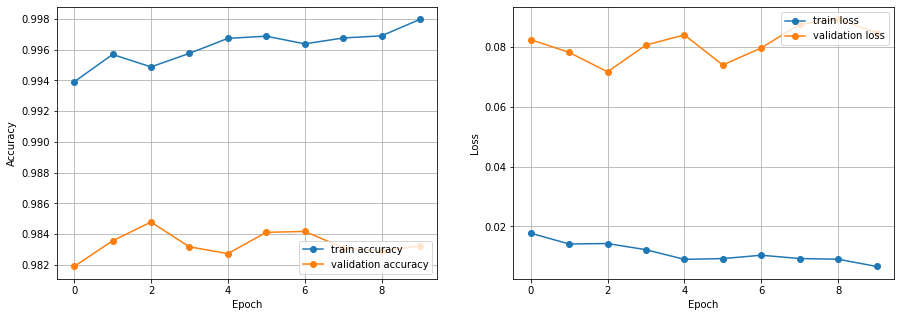

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9848

Test accuracy: 0.9847999811172485
